<a href="https://colab.research.google.com/github/jsutin870207/MachineLearning/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Final Program**
> 資料集名稱:'image segmentation'

**啟用:**

　　1.右上角點選「連線」(登入google帳號)，等待連線成功

　　2.點選下方程式碼撥放鍵（或在程式碼區段按Ctrl+Enter鍵）

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import os
import csv  
import copy
import random
pd.options.mode.chained_assignment = None  # default='warn'

**上傳檔案：**

點選下方播放鍵，選擇檔案　'image_segmentation.csv’


---



若出現結果： 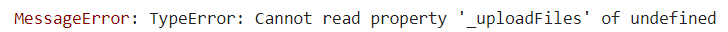

點選右上角google瀏覽器**「設定」**

　　->**「隱私與安全性」**

　　->**「Cookie和其他網站資料」**

　　->**點選「允許所有Cookie」**
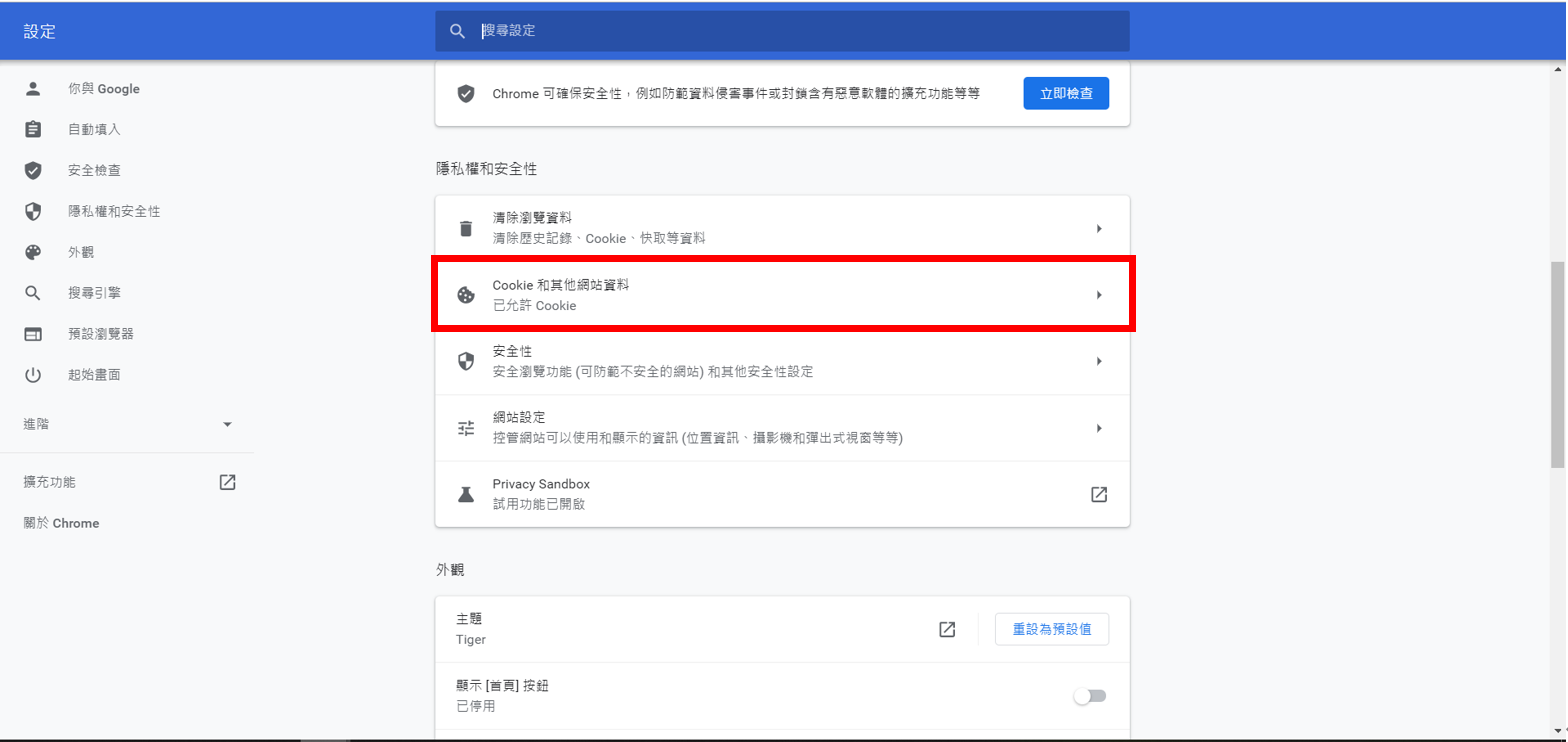

再**重新點選撥放鍵**，應可選擇檔案

In [ ]:
uploaded = files.upload()
#讀檔
filename = 'image_segmentation.csv'
file = pd.read_csv(open(filename,'rb'),delimiter=',',quotechar='|',header=None)
print(file)

### **定義函式功能：**　

點選下方撥放鍵

In [ ]:
def descritization(list,index) :
  m,n = np.shape(list)
  tmp_list = np.zeros((m,1))
  spliting_point = np.zeros((11,1))
  min = 1000
  max = -100
  # print('this is index',index+1)

  #1.find min&max
  for i in range(0,len(tmp_list)):
    if list[i][index] > max:
      max = list[i][index]
    if list[i][index] < min:
      min = list[i][index]
  # print('min:',int(min),'max:',int(max))
  #2.10 bins
  width = (max-min)/10
  for i in range(0,11):
    spliting_point[i] = min+width*i
  # print(spliting_point)
  #3.discritization
  for i in range(0,len(tmp_list)):
    for j in range(0,len(spliting_point)-1):
      if list[i][index] <= spliting_point[1]:
        tmp_list[i] = int(1)
      elif spliting_point[j] < list[i][index] and list[i][index] <= spliting_point[j+1]:
        tmp_list[i] = int(j+1)
  # print(tmp_list)
  return tmp_list

def train(data,prior):
  data.index = range(len(data))
  # print(data)
  posterior_table = [[]for i in range(0,len(data.columns)-1)]
  # print(posterior_table)
  freq_table = pd.DataFrame()
  # print(freq_table)
  #1.按attribute&類別化分資料
  for k in range(0,len(data.columns)-1): #根據column數輸出table
    tmp = pd.crosstab(index=data[k],columns=data[len(data.columns)-1],rownames=['attr'],colnames=['class'])
    # print('tmp',tmp)
    #複製
    for i in range(1,11): #10個類別
      for j in range(1,8): #class值 1~7
        try:
          freq_table.loc[i,j]=tmp.loc[i,j]
        except:
          freq_table.loc[i,j]=0
          continue 
    # print(freq_table)
  #2.加上proir
    for i in range(0,len(freq_table)):
      for j in range(0,len(freq_table.columns)):
        freq_table.iat[i,j] = freq_table.iat[i,j]+prior #用位置
    # print(freq_table)

    all_1 = freq_table.loc[:,1].sum() #用欄位名稱
    all_2 = freq_table.loc[:,2].sum()
    all_3 = freq_table.loc[:,3].sum() #用欄位名稱
    all_4 = freq_table.loc[:,4].sum()
    all_5 = freq_table.loc[:,5].sum() #用欄位名稱
    all_6 = freq_table.loc[:,6].sum()
    all_7 = freq_table.loc[:,7].sum() #用欄位名稱
    freq_table = freq_table.astype(float)

  #3.計算posterior
    for i in range(0,len(freq_table)):
      for j in range(0,len(freq_table.columns)):
        if j==0:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_1
        if j==1:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_2
        if j==2:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_3
        if j==3:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_4
        if j==4:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_5
        if j==5:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_6
        if j==6:
          freq_table.iat[i,j] = float(freq_table.iat[i,j])/all_7

    # print(freq_table)
    # if k != 9:
    posterior_table[k] = copy.copy(freq_table)
  # print(posterior_table)
  return posterior_table
  
def test(posterioir_table,data,prob_y):
  data.index = range(len(data))
  #用index名稱搜尋
  count =0
  for i in range(0,len(data)):
    row_data = data.loc[i]
    predict_class = predict(row_data,posterioir_table,prob_y)
    act_class = row_data[len(row_data)-1]
    # print(predict_class)
    # print(act_class)
    if (predict_class == act_class): #預測正確
      count = count +1
  accuracy = count/len(data)
  # print("正確率:",accuracy)
  return accuracy

def predict(list,table,prob_y):
  # print(list[19])
  #print(table[0]) #table:0~18
  class_list = [[]for i in range(0,7)] #7個class
  for i in range(0,7):
    class_list[i] = prob_y[i]

  for k in range(0,7):
    for i in range (0,19): #0~18 - 第20代表類別
      for j in range (1,11) : #類別值 0~11
        if list[i] ==j:
          prob = table[i][k+1][j]
          class_list[k] = class_list[k] * prob
  # print(class_list)
  #get max value's index
  predict = class_list.index(max(class_list))
  #return class value
  predict = predict+1
  # print(predict)
  return predict

def get_p_y(training_this_round): #get the probility of p(y)
  training_this_round.index = range(len(training_this_round))
  # print(training_this_round)
  count_class = [0,0,0,0,0,0,0] #7個class
  for i in range(0,len(training_this_round)):
    # print(training_this_round.iat[i,8])
    if training_this_round.iat[i,len(training_this_round.columns)-1] == 1 :
      count_class[0] = count_class[0]+1
    elif training_this_round.iat[i,len(training_this_round.columns)-1] == 2:
      count_class[1] = count_class[1]+1
    elif training_this_round.iat[i,len(training_this_round.columns)-1] == 3 :
      count_class[2] = count_class[2]+1
    elif training_this_round.iat[i,len(training_this_round.columns)-1] == 4 :
      count_class[3] = count_class[3]+1
    elif training_this_round.iat[i,len(training_this_round.columns)-1] == 5 :
      count_class[4] = count_class[4]+1
    elif training_this_round.iat[i,len(training_this_round.columns)-1] == 6 :
      count_class[5] = count_class[5]+1
    else :
      count_class[6] = count_class[6]+1

  count_class[0] = count_class[0]/len(training_this_round)
  count_class[1] = count_class[1]/len(training_this_round)
  count_class[2] = count_class[2]/len(training_this_round)
  count_class[3] = count_class[3]/len(training_this_round)
  count_class[4] = count_class[4]/len(training_this_round)
  count_class[5] = count_class[5]/len(training_this_round)
  count_class[6] = count_class[6]/len(training_this_round)
  # print(count_class)
  return count_class

### **預處理檔案：**　

點選下方撥放鍵

In [ ]:
file = file.drop(0,axis=0)
file = file.reindex(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,0])
file.index = range(len(file))
file.columns = range(len(file.columns))
print(file)

m,n = np.shape(file)
sublist = np.zeros((m,n))
tmp_arr = np.zeros((m,1))
ew_array = copy.deepcopy(file) #equal_width
#1.預處理
for i in list(ew_array):
  if i != len(file.columns)-1: 
    for j in range(0,len(file)):
      sublist[j][i] = ew_array[i][j]
    tmp_arr=descritization(sublist,i)  #離散化
    for j in range(0,len(file)):
      ew_array[i][j] = tmp_arr[j]
ew_array = ew_array.astype(int)
print(ew_array)

### **顯示執行結果：**

點選下方撥放鍵

In [ ]:
#Calculate
for m in range(1,61): #prior
  print("prior is :" ,m)
  #1.five-fold cross
  training = copy.deepcopy(ew_array)
  #打亂排序
  num_folds = 5
  average = 0
  subset_size = int(len(training)/num_folds)
  for i in range(num_folds):
  # for i in range(0,1):
    testing_this_round = training[i*subset_size:][:subset_size]
    training_this_round = training[:i*subset_size].append(training[(i+1)*subset_size:])
    #train
    # print("this　is round",i+1)
    prob_y = get_p_y(training_this_round)
    posterior_table = train(training_this_round,m)
    # print(len(posterior_table))
    #test
    acc = test(posterior_table,testing_this_round,prob_y)
    # print(acc)
    average = average+acc
  average = average/num_folds
  print("平均正確率",average)